In [1]:
import pydynverse as pdv

logger = pdv.logger
logger.setLevel("DEBUG")

pdv.settings.backend = "container"


  _____       _____                                     
 |  __ \     |  __ \                                    
 | |__) |   _| |  | |_   _ _ ____   _____ _ __ ___  ___ 
 |  ___/ | | | |  | | | | | '_ \ \ / / _ \ '__/ __|/ _ \
 | |   | |_| | |__| | |_| | | | \ V /  __/ |  \__ \  __/
 |_|    \__, |_____/ \__, |_| |_|\_/ \___|_|  |___/\___|
         __/ |        __/ |                             
        |___/        |___/         



In [2]:
# 1. 准备数据(wrap)
dataset = pdv.data.load_simulation_data(data_filename="real/silver/fibroblast-reprogramming_treutlein.rds")
dataset

{'id': 'real/silver/fibroblast-reprogramming_treutlein',
 'cell_ids': ['1_iN1_C01',
  '1_iN1_C02',
  '1_iN1_C03',
  '1_iN1_C04',
  '1_iN1_C05',
  '1_iN1_C07',
  '1_iN1_C08',
  '1_iN1_C09',
  '1_iN1_C10',
  '1_iN1_C11',
  '1_iN1_C12',
  '1_iN1_C13',
  '1_iN1_C14',
  '1_iN1_C15',
  '1_iN1_C16',
  '1_iN1_C17',
  '1_iN1_C19',
  '1_iN1_C20',
  '1_iN1_C21',
  '1_iN1_C22',
  '1_iN1_C23',
  '1_iN1_C25',
  '1_iN1_C26',
  '1_iN1_C27',
  '1_iN1_C29',
  '1_iN1_C30',
  '1_iN1_C31',
  '1_iN1_C33',
  '1_iN1_C34',
  '1_iN1_C35',
  '1_iN1_C36',
  '1_iN1_C37',
  '1_iN1_C38',
  '1_iN1_C40',
  '1_iN1_C41',
  '1_iN1_C42',
  '1_iN1_C43',
  '1_iN1_C44',
  '1_iN1_C46',
  '1_iN1_C47',
  '1_iN1_C48',
  '1_iN1_C49',
  '1_iN1_C51',
  '1_iN1_C52',
  '1_iN1_C53',
  '1_iN1_C54',
  '1_iN1_C55',
  '1_iN1_C56',
  '1_iN1_C57',
  '1_iN1_C58',
  '1_iN1_C60',
  '1_iN1_C61',
  '1_iN1_C62',
  '1_iN1_C64',
  '1_iN1_C66',
  '1_iN1_C67',
  '1_iN1_C68',
  '1_iN1_C69',
  '1_iN1_C70',
  '1_iN1_C71',
  '1_iN1_C72',
  '1_iN1_C73',
 

In [3]:
# 2. 选择方法(method), 目前stuba和grandprix有点问题
methods_selected_list = [pdv.methods.ti_slingshot()]
methods_selected = methods_selected_list[0]
logger.info(f"Methods {methods_selected} selecting finished")

[2025年01月12日 12时43分45秒] INFO     backend: container                                                          
                        DEBUG    Docker image(dynverse/ti_slingshot:v1.0.3) loaded                                 
                        INFO     Methods {'method': {'id': 'slingshot', 'name': 'Slingshot', 'source': 'tool',     
                                 'platform': 'R', 'license': 'Artistic-2.0', 'url':                                
                                 'https://github.com/kstreet13/slingshot', 'authors': [{'given': 'Kelly', 'family':
                                 'Street', 'email': 'street.kelly@gmail.com', 'github': 'kstreet13'}, {'given':    
                                 'Sandrine', 'family': 'Dudoit', 'email': 'sandrine@stat.berkeley.edu', 'ORCID':   
                                 '0000-0002-6069-8629', 'github': 'sandrinedudoit'}]}, 'wrapper': {'type':         
                                 'trajectory', 'topology_inference': 'free', '

In [4]:
# 3. 运行方法(wrap)
# add_prior_information(dataset, end_n=3)  # 运行grand prix需要的先验知识
model = pdv.wrap.infer_trajectory(dataset, methods_selected)
logger.info(f"Methods executing finished, model: {model}")

                        DEBUG    Temp wd: /tmp/tmpltbxzvj9                                                         
                        DEBUG    Save json successfully, path: /tmp/tmpltbxzvj9/input.json                         
                        DEBUG    h52json script:                                                                   
                                 /home/huang/PyCode/scRNA/PyDynverse/PyDynverse/pydynverse/util/../rscript/docker_i
                                 nput_json2h5.R                                                                    
[2025年01月12日 12时43分47秒] DEBUG    CompletedProcess(args=['/home/huang/PyCode/scRNA/PyDynverse/PyDynverse/pydyn
                                       verse/util/../rscript/docker_input_json2h5.R', '--input_json_filename',     
                                       '/tmp/tmpltbxzvj9/input.json', '--input_h5_filename',                       
                                       '/tmp/tmpltbxzvj9/input.h5'], returncod

                        INFO     Coloring by grouping                                                              
                        WARNING  The number of colors(7) is greater than the number of colors in the 'Set3'        
                                 palette(12), and the 'husl' palette selection is used.                            
                        DEBUG    selecting waypoints                                                               
[2025年01月12日 12时43分58秒] DEBUG    selecting waypoints shape is (675, 355), finished!                          
                        INFO     Result plotting finished                                                          


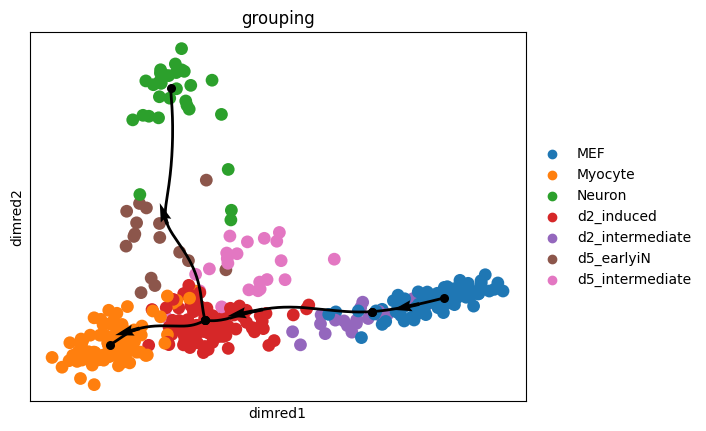

In [5]:
# 4. 绘制轨迹(dimred+plot)
cluster_list = dataset["grouping"]
pdv.plot.plot_dimred(model, grouping=cluster_list)
logger.info("Result plotting finished")